# Cosine similarity, Spotify song search results recommendation algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)

In [2]:
data=pd.read_csv('genres_v2.csv', encoding='utf-8', quotechar='"')

In [3]:
data.head(11)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.831   0.814    2    -7.364     1       0.4200        0.0598   
1          0.719   0.493    8    -7.230     1       0.0794        0.4010   
2          0.850   0.893    5    -4.783     1       0.0623        0.0138   
3          0.476   0.781    0    -4.710     1       0.1030        0.0237   
4          0.798   0.624    2    -7.668     1       0.2930        0.2170   
5          0.721   0.568    0   -11.295     1       0.4140        0.0452   
6          0.718   0.668    8    -4.162     1       0.1370        0.0254   
7          0.694   0.711    8    -5.525     1       0.2210        0.0397   
8          0.774   0.751    1    -2.445     1       0.1980        0.0614   
9          0.893   0.907   11   -10.406     1       0.3670        0.1520   
10         0.864   0.365    8   -10.219     1       0.0655        0.1870   

    instrumentalness  liveness  valence  ...                      id  \
0           0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1           0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2           0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3           0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4           0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   
5           0.212000    0.1280   0.1090  ...  6fsypiJHyWmeINsOLC1cos   
6           0.007800    0.1240   0.0380  ...  0XfQbq7DaMOmVXgQ71eA6E   
7           0.000000    0.1120   0.2830  ...  0LLeuNBWPOg3XA73yab3PT   
8           0.000000    0.0728   0.1890  ...  37gqBnUAZe8BY8WR56kDNk   
9           0.031100    0.5580   0.3020  ...  2ggqfj97qyiORmXoVFzP5j   
10          0.000000    0.1160   0.0478  ...  7EL7ifncK2PWFYThJjzR25   

                                     uri  \
0   spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1   spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2   spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3   spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4   spotify:track:4jCeguq9rMTlbMmPHuO7S3   
5   spotify:track:6fsypiJHyWmeINsOLC1cos   
6   spotify:track:0XfQbq7DaMOmVXgQ71eA6E   
7   spotify:track:0LLeuNBWPOg3XA73yab3PT   
8   spotify:track:37gqBnUAZe8BY8WR56kDNk   
9   spotify:track:2ggqfj97qyiORmXoVFzP5j   
10  spotify:track:7EL7ifncK2PWFYThJjzR25   

                                           track_href  \
0   https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1   https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2   https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3   https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4   https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   
5   https://api.spotify.com/v1/tracks/6fsypiJHyWme...   
6   https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...   
7   https://api.spotify.com/v1/tracks/0LLeuNBWPOg3...   
8   https://api.spotify.com/v1/tracks/37gqBnUAZe8B...   
9   https://api.spotify.com/v1/tracks/2ggqfj97qyiO...   
10  https://api.spotify.com/v1/tracks/7EL7ifncK2PW...   

                                         analysis_url duration_ms  \
0   https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1   https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2   https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3   https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4   https://api.spotify.com/v1/audio-analysis/4jCe...      123298   
5   https://api.spotify.com/v1/audio-analysis/6fsy...      112511   
6   https://api.spotify.com/v1/audio-analysis/0XfQ...       77584   
7   https://api.spotify.com/v1/audio-analysis/0LLe...      127524   
8   https://api.spotify.com/v1/audio-analysis/37gq...      140326   
9   https://api.spotify.com/v1/audio-analysis/2ggq...      121979   
10  https://api.spotify.com/v1/audio-analysis/7EL7...      101172   

   time_signature      genre                                      song_name  \
0               4  Dark Trap                            Mercury: Retrograde   
1               4  Dark T

In [4]:
cols=list(data.columns[11:])
del cols[7]

In [5]:
df=copy.deepcopy(data)
df.drop(columns=cols,inplace=True)

In [6]:
data

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence  ...                      id  \
0              0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1              0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2              0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3              0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4              0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   
...                 ...       ...      ...  ...                     ...   
42300          0.000345    0.1210   0.3940  ...  46bXU7Sgj7104ZoXxzz9tM   
42301          0.000018    0.2050   0.3830  ...  0he2ViGMUO3ajKTxLOfWVT   
42302          0.000242    0.3850   0.1240  ...  72DAt9Lbpy9EUS29OzQLob   
42303          0.029600    0.0575   0.4880  ...  6HXgExFVuE1c3cq9QjFCcU   
42304          0.000055    0.4140   0.1340  ...  6MAAMZImxcvYhRnxDLTufD   

                                        uri  \
0      spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1      spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4      spotify:track:4jCeguq9rMTlbMmPHuO7S3   
...                                     ...   
42300  spotify:track:46bXU7Sgj7104ZoXxzz9tM   
42301  spotify:track:0he2ViGMUO3ajKTxLOfWVT   
42302  spotify:track:72DAt9Lbpy9EUS29OzQLob   
42303  spotify:track:6HXgExFVuE1c3cq9QjFCcU   
42304  spotify:track:6MAAMZImxcvYhRnxDLTufD   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1      https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2      https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3      https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4      https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   
...                                                  ...   
42300  https://api.spotify.com/v1/tracks/46bXU7Sgj710...   
42301  https://api.spotify.com/v1/tracks/0he2ViGMUO3a...   
42302  https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...   
42303  https://api.spotify.com/v1/tracks/6HXgExFVuE1c...   
42304  https://api.spotify.com/v1/tracks/6MAAMZImxcvY...   

                                            analysis_url duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1      https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2      https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3      https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4      https://api.spotify.com/v1/audio-analysis/4jCe...      123298   
...                                                  ...         ...   
42300  https://api.spotify.com/v1/audio-analysis/46bX...      269208   
42301  https://api.spotify.com/v1/audio-analysis/0he2...      210112   
42302  https://api.spotify.com/v1/audio-analysis/72DA...      234823   
42303  https://api.spotify.com/v1/audio-analysis/6HXg...      323200   
42304  https://api.spotify.com/v1/audio-analysis/6MAA...      162161   

      

In [7]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

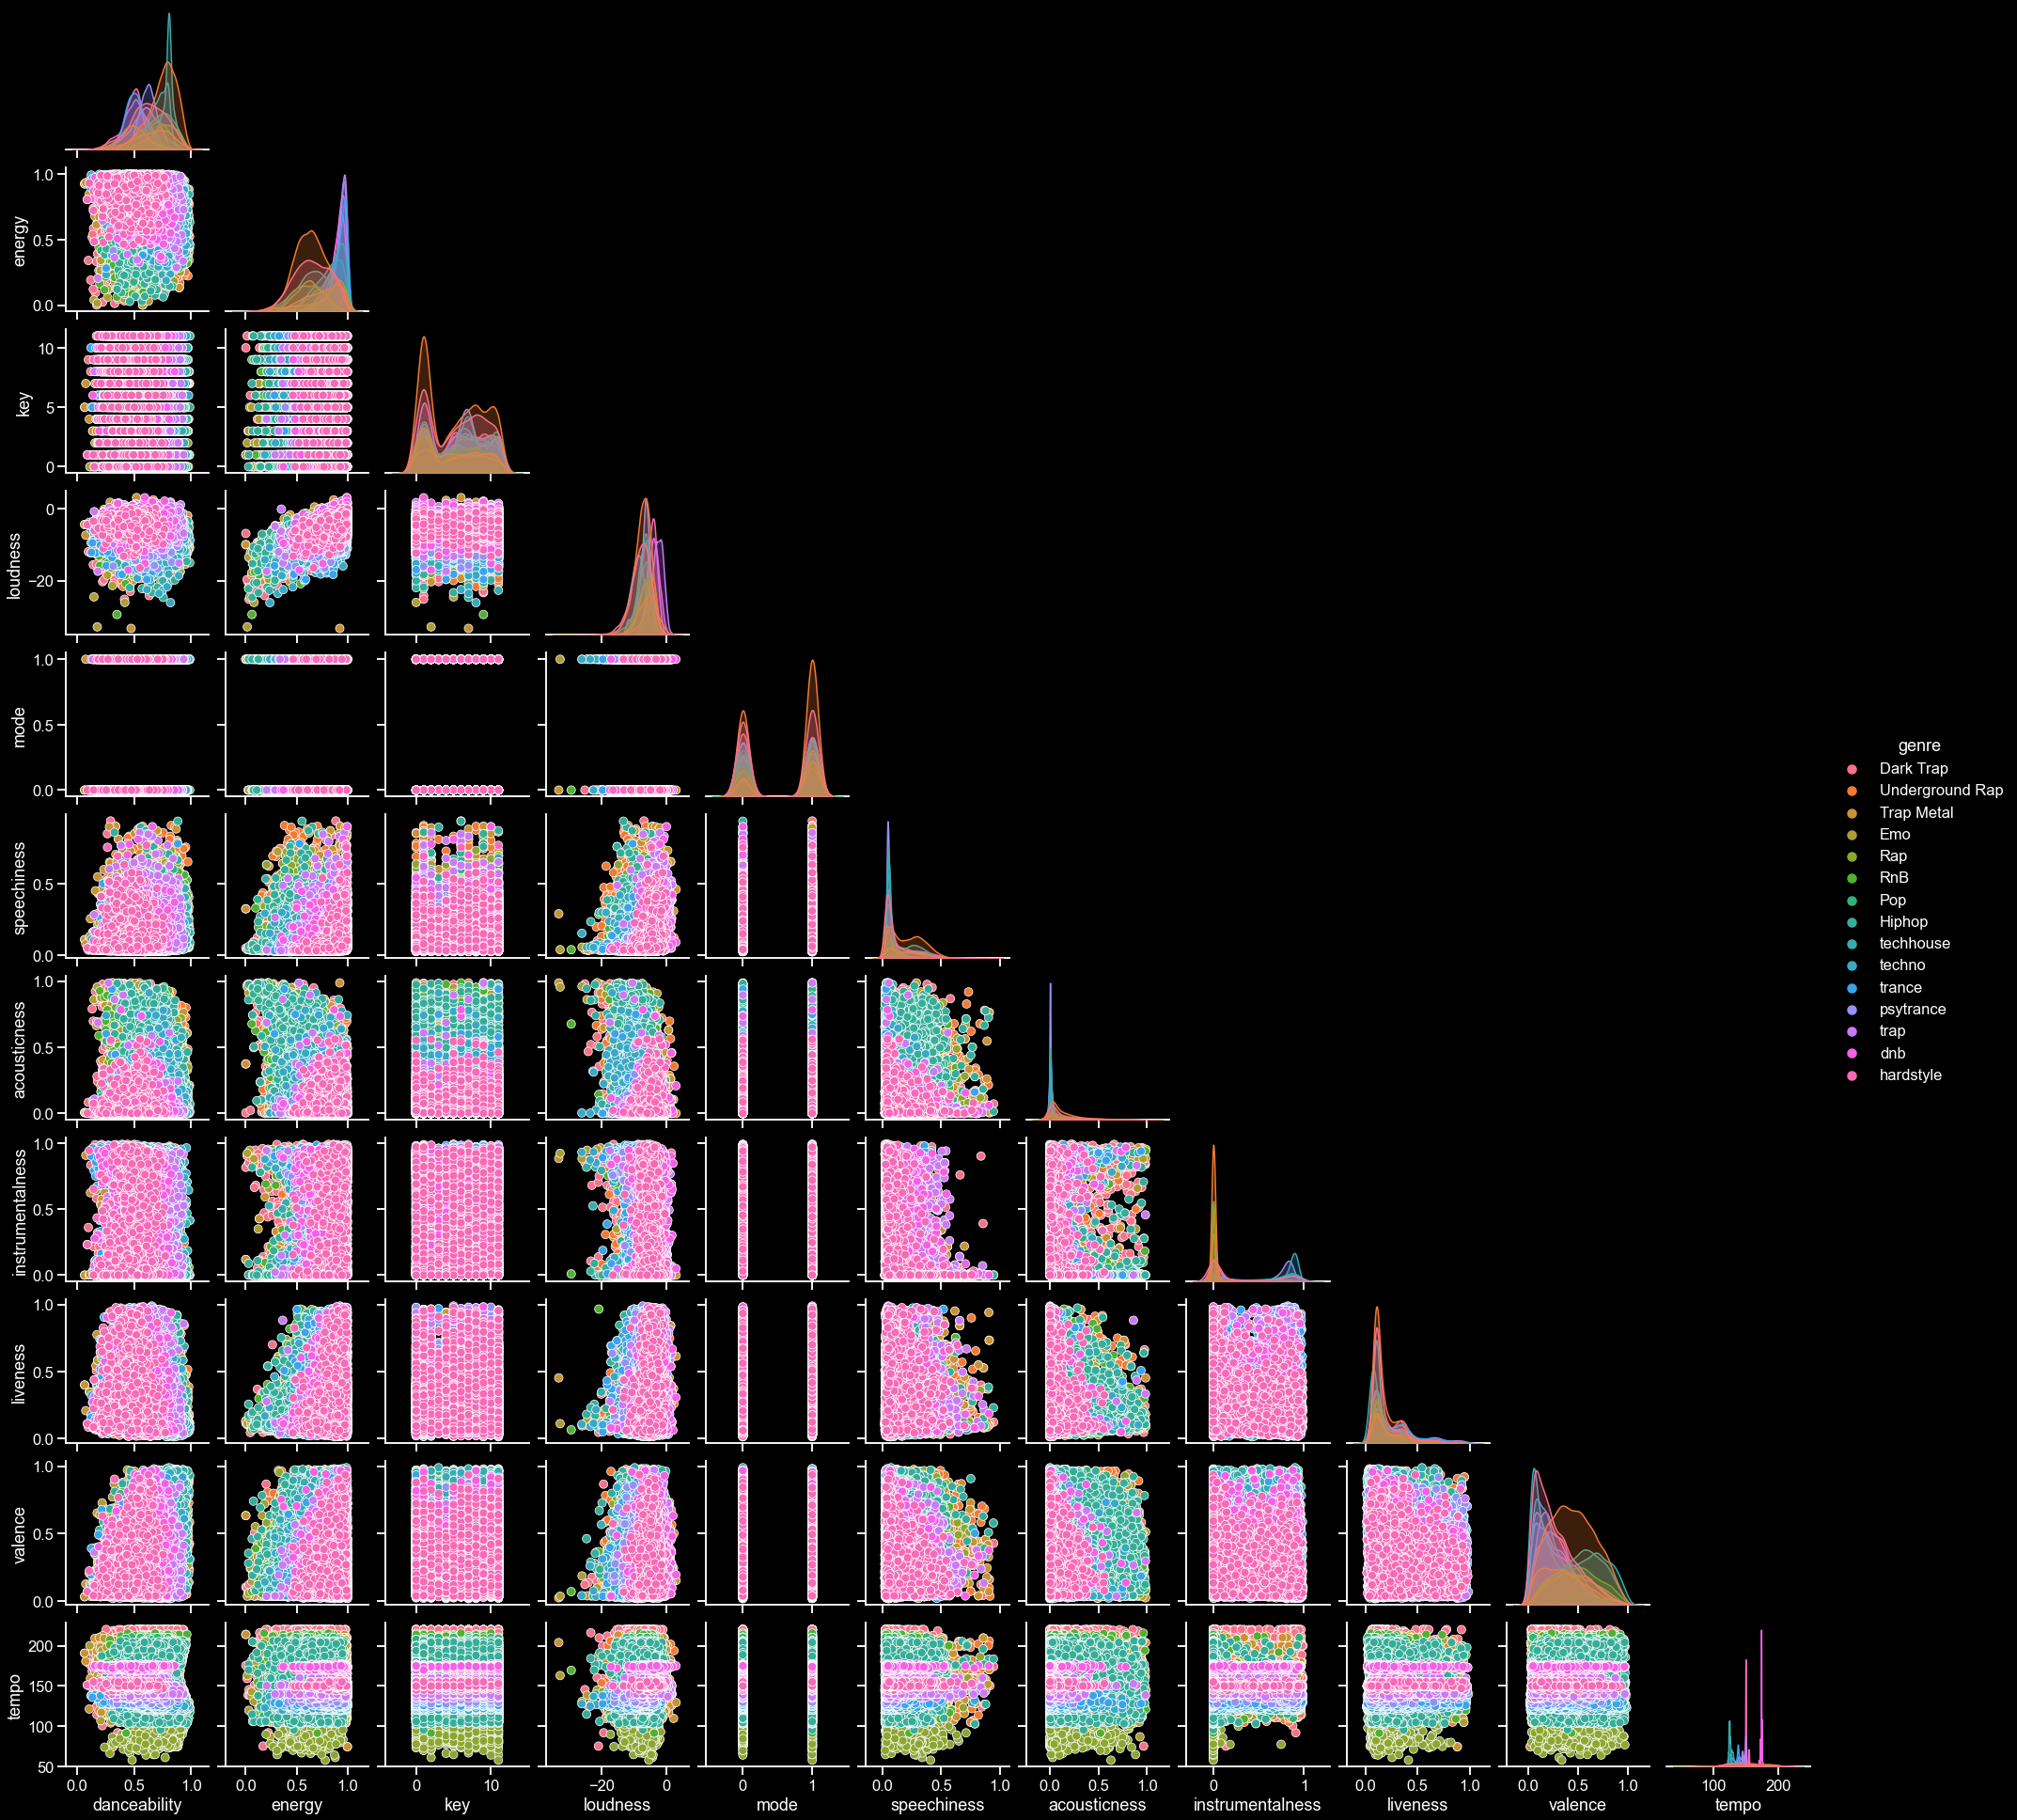

In [8]:
sns.pairplot(df,corner=True,hue='genre')

In [9]:
px.box(data_frame=data,y='duration_ms',color='genre')

In [10]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
data=data.dropna(subset=['song_name'])

In [12]:
df=data[data.columns[:11]]
df['genre']=data['genre']
df['time_signature']=data['time_signature']
df['duration_ms']=data['duration_ms']
df['song_name']=data['song_name']

In [13]:
x=df[df.drop(columns=['song_name','genre']).columns].values
scaler = StandardScaler().fit(x)
X_scaled = scaler.transform(x)
df[df.drop(columns=['song_name','genre']).columns]=X_scaled

In [14]:
def find_word(word,words):
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    return words[t[0][1]]

In [15]:
def make_matrix(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])

In [18]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
make_matrix(df,a,b)

Please enter The name of the song :veno
Please enter the number of recommendations you want: 3
The song closest to your search is : Venom
Fear None
Backpack
You've come to the right place for a burial!
